In [609]:
#Package
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings(action='ignore')
# pd.set_option('display.max_rows', None)

In [610]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [611]:
test = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_test.csv")
train = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_train.csv")

In [612]:
# merged_ data에서 drop해야 할 단지코드
#print(train.shape, test.shape)
#train = train.loc[~train.단지코드.isin(['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']),]
#test = test.loc[~test.단지코드.isin(['C2335', 'C1327', 'C2675'])]
#print(train.shape, test.shape)

In [613]:
print(len(set(train.단지코드)), len(set(test.단지코드)))

414 147


In [614]:
print(train.shape, test.shape)

(2896, 34) (1008, 33)


In [615]:
train=train.drop_duplicates(keep='first')
test=test.drop_duplicates(keep='first')

In [616]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명',
       '도로명주소', '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율'],
      dtype='object')

## 상가비율, 대형전용면적, 세대당가능주차면수, 공가수

In [617]:
print("\n...Before preprocessing")
print(train.shape, test.shape)

# 상가비율 column 추가
train_cls = pd.concat([train[['단지코드']], pd.get_dummies(train[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = train_cls['임대건물구분_상가']+train_cls['임대건물구분_아파트']
train_cls['상가비율'] = train_cls['임대건물구분_상가']/tot
train = pd.merge(train,train_cls[['상가비율']].reset_index(),on='단지코드')

test_cls = pd.concat([test[['단지코드']], pd.get_dummies(test[['임대건물구분']])], axis=1).groupby('단지코드').sum()
tot = test_cls['임대건물구분_상가']+test_cls['임대건물구분_아파트']
test_cls['상가비율'] = test_cls['임대건물구분_상가']/tot
test = pd.merge(test,test_cls[['상가비율']].reset_index(),on='단지코드')

# 세대당_가능주차면수 column 추기
train['세대당_가능주차면수'] = train['단지내주차면수']/train['총세대수']
test['세대당_가능주차면수'] = test['단지내주차면수']/test['총세대수']

# 공가수비율 column 추가
train['공가수비율']= train.공가수/train.총세대수 
test['공가수비율']= test.공가수/test.총세대수 

# 대형전용면적 column 추가
level = 85
train['대형전용면적'] = 0
train.loc[train.전용면적>level, '대형전용면적'] = 1
train.loc[train.전용면적<=level, '대형전용면적'] = 0

test['대형전용면적'] = 0
test.loc[test.전용면적>level, '대형전용면적'] = 1
test.loc[test.전용면적<=level, '대형전용면적'] = 0

# check
print("\n...After preprocessing")
print(train.shape, test.shape)


...Before preprocessing
(2577, 34) (936, 33)

...After preprocessing
(2577, 38) (936, 37)


In [618]:
#train["법정동_세대수"]=(train.총인구수/train.세대당_인구)/train.총세대수
#test["법정동_세대수"]=(test.총인구수/test.세대당_인구)/test.총세대수

# 자격유형

In [619]:
dic = {'1': 'A' ,'2':['C','F','G'],'3':['B','H','I'],'4':['J'],
       '5':['L',"M","N","O"],'6':["E","K"],'7':'D'}

In [620]:
def mapping_by_key(dic, x):
    for i in dic.keys():
        if x in dic[i]:
            return int(i)

In [621]:
train['자격유형_카테고리'] = train['자격유형'].apply(lambda x : mapping_by_key(dic, x))
train['자격유형_카테고리'] = train['자격유형_카테고리'].astype(object)
test['자격유형_카테고리'] = test['자격유형'].apply(lambda x : mapping_by_key(dic, x))
test['자격유형_카테고리'] = test['자격유형_카테고리'].astype(object)
train= train.drop(columns="자격유형")
test= test.drop(columns="자격유형")

# 공급유형

In [622]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공임대(10년)']), '공급유형'] = '공공임대(단기)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공임대(10년)']), '공급유형'] = '공공임대(단기)'

In [623]:
train.shape, test.shape

((2577, 38), (936, 37))

# 어제 결과를 보니까 1차원으로 해야 할 것 같다.

In [624]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명', '도로명주소',
       '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수', '총인구수',
       '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상',
       '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '상가비율', '세대당_가능주차면수',
       '공가수비율', '대형전용면적', '자격유형_카테고리'],
      dtype='object')

In [625]:
len(set(train.단지코드))

414

In [626]:
data = train.drop(columns=['공급유형','자격유형_카테고리','전용면적','임대건물구분',
                           '전용면적별세대수','대형전용면적','자격유형_카테고리',
                           '임대보증금','임대료'])
data = data.drop_duplicates()

In [627]:
data.shape

(414, 30)

In [628]:
sample = pd.DataFrame(train.groupby(['단지코드','공급유형']).sum()['전용면적별세대수']).reset_index()

In [629]:
sample.head()

,단지코드,공급유형,전용면적별세대수
0,C1000,국민임대,566
1,C1004,영구임대,504
2,C1004,임대상가,13
3,C1005,국민임대,1144
4,C1013,국민임대,1308


In [630]:
for i in sample.공급유형.unique():
    data[str(i)]=0

In [631]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'공급유형']
    val = sample.loc[i,'전용면적별세대수']
    ind = data[data['단지코드']==code].index
    data.loc[ind,col] = val

In [632]:
# sample = train[train.임대건물구분 == "아파트"].groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
# sample.head()
sample = train.groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
sample.head()

,단지코드,임대료,임대보증금
0,C1000,"121,064.2857","13,203,571.4286"
1,C1004,"877,964.1872","10,383,958.6857"
2,C1005,"222,046.6667","17,107,666.6667"
3,C1013,"134,726.0000","24,924,800.0000"
4,C1014,"160,488.5714","23,894,000.0000"


In [633]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val1 = sample.loc[i,'임대료']
    val2 = sample.loc[i,'임대보증금']
    ind = data[data['단지코드']==code].index
    data.loc[ind,'임대료'] = val1
    data.loc[ind,'임대보증금'] = val2

In [634]:
sample = pd.DataFrame(train.groupby(['단지코드','자격유형_카테고리']).sum()['전용면적별세대수']).reset_index()
sample.head()

,단지코드,자격유형_카테고리,전용면적별세대수
0,C1000,1,566
1,C1004,2,504
2,C1004,7,13
3,C1005,1,1144
4,C1013,1,1308


In [635]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'자격유형_카테고리']
    val = sample.loc[i,'전용면적별세대수']
    ind = data[data['단지코드']==code].index
    data.loc[ind,col] = val

In [636]:
data=data.fillna(0)

In [637]:
sample = pd.DataFrame(train.groupby('단지코드')['대형전용면적'].sum()).reset_index()
sample.head()

,단지코드,대형전용면적
0,C1000,0
1,C1004,1
2,C1005,0
3,C1013,0
4,C1014,0


In [638]:
data=pd.merge(data, sample, on="단지코드", how="inner")

In [639]:
data.shape

(414, 49)

sample1=pd.DataFrame(train.groupby("단지코드")["임대료"].std()).reset_index()
sample2=pd.DataFrame(train.groupby("단지코드")["임대보증금"].std()).reset_index()
data=pd.merge(data, sample1, on="단지코드", how="inner")
data=pd.merge(data, sample2, on="단지코드", how="inner")
sample1=pd.DataFrame(test.groupby("단지코드")["임대료"].std()).reset_index()
sample2=pd.DataFrame(test.groupby("단지코드")["임대보증금"].std()).reset_index()
dat=pd.merge(dat, sample1, on="단지코드", how="inner")
dat=pd.merge(dat, sample2, on="단지코드", how="inner")

data.loc[data.전용면적_std.isna(),"전용면적_std"] = 0
data.loc[data.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
data.loc[data.임대보증금_std.isna(),"임대보증금_std"] = 0
data.loc[data.임대료_std.isna(),"임대료_std"] = 0

# Test에 똑같이

In [640]:
print(len(set(test.단지코드)))
dat = test.drop(columns=['공급유형','자격유형_카테고리','전용면적','임대건물구분',
                           '전용면적별세대수','대형전용면적','자격유형_카테고리',
                           '임대보증금','임대료'])
dat = dat.drop_duplicates()
dat.shape

147


(147, 29)

In [641]:
sample = pd.DataFrame(test.groupby(['단지코드','공급유형']).sum()['전용면적별세대수']).reset_index()
sample.head()

,단지코드,공급유형,전용면적별세대수
0,C1003,행복주택,480
1,C1006,영구임대,1475
2,C1006,임대상가,13
3,C1016,국민임대,643
4,C1019,국민임대,321


In [642]:
for i in sample.공급유형.unique():
    dat[str(i)]=0

In [643]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'공급유형']
    val = sample.loc[i,'전용면적별세대수']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,col] = val

In [644]:
# sample = test[test.임대건물구분 == "아파트"].groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
# sample.head()
sample = test.groupby('단지코드').mean()[['임대료','임대보증금']].reset_index()
sample.head()

,단지코드,임대료,임대보증금
0,C1003,"115,875.0000","22,650,000.0000"
1,C1006,"2,333,169.1152","17,549,529.3035"
2,C1016,"228,010.0000","24,026,750.0000"
3,C1019,"126,430.0000","14,857,500.0000"
4,C1030,"214,216.6667","51,413,333.3333"


In [645]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    val1 = sample.loc[i,'임대료']
    val2 = sample.loc[i,'임대보증금']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,'임대료'] = val1
    dat.loc[ind,'임대보증금'] = val2

In [646]:
sample = pd.DataFrame(test.groupby(['단지코드','자격유형_카테고리']).sum()['전용면적별세대수']).reset_index()
sample.head()

,단지코드,자격유형_카테고리,전용면적별세대수
0,C1003,4,480
1,C1006,2,1459
2,C1006,7,29
3,C1016,1,643
4,C1019,1,321


In [647]:
for i in sample.index:
    code = sample.loc[i,'단지코드']
    col = sample.loc[i,'자격유형_카테고리']
    val = sample.loc[i,'전용면적별세대수']
    ind = dat[dat['단지코드']==code].index
    dat.loc[ind,col] = val

In [648]:
dat=dat.fillna(0)

In [649]:
sample = pd.DataFrame(test.groupby('단지코드')['대형전용면적'].sum()).reset_index()
sample.head()

,단지코드,대형전용면적
0,C1003,0
1,C1006,1
2,C1016,0
3,C1019,0
4,C1030,0


In [650]:
dat=pd.merge(dat, sample, on="단지코드", how="inner")

In [651]:
dat.columns=[       '단지코드',        '총세대수',          '지역',         '공가수',
              '지하철역',       '버스정류장',     '단지내주차면수',         '단지명',
             '도로명주소',         '연면적',          '위도',          '경도',
       'subway_name', 'subway_dist',       '환승역 수',        '총인구수',
            '세대당_인구',       '남/여비율',   '남/여_0~19세',  '남/여_20~39세',
        '남/여_40~69세',   '남/여_70세이상',    '0~19세_비율',   '20~39세_비율',
         '40~69세_비율',    '70세이상_비율',    '상가비율',  '세대당_가능주차면수',
             '공가수비율',        '행복주택',        '영구임대',        '임대상가',
              '국민임대',   '공공임대(50년)',    '공공임대(단기)',    '공공임대(분납)',
               '임대료',       '임대보증금',             '자격유형4',             '자격유형2',
                   '자격유형7',             '자격유형1',             '자격유형6',             '자격유형3',
                   '자격유형5',      '대형전용면적']
data.columns=[  '단지코드',        '총세대수',          '지역',         '공가수',
              '지하철역',       '버스정류장',     '단지내주차면수',       '등록차량수',
               '단지명',       '도로명주소',         '연면적',          '위도',
                '경도', 'subway_name', 'subway_dist',       '환승역 수',
              '총인구수',      '세대당_인구',       '남/여비율',   '남/여_0~19세',
        '남/여_20~39세',  '남/여_40~69세',   '남/여_70세이상',    '0~19세_비율',
         '20~39세_비율',   '40~69세_비율',    '70세이상_비율',  '상가비율',
        '세대당_가능주차면수',       '공가수비율',        '국민임대',        '영구임대',
              '임대상가',    '공공임대(단기)',        '장기전세',        '행복주택',
          '공공임대(분납)',        '공공분양',   '공공임대(50년)',         '임대료',
             '임대보증금', '자격유형1',  '자격유형2',             '자격유형7',
                   '자격유형3', '자격유형6','자격유형4','자격유형5',
            '대형전용면적']

In [652]:
data["전용면적_std"] = train.groupby("단지코드").std().reset_index()["전용면적"]
data["전용면적별세대수_std"] = train.groupby("단지코드").std().reset_index()["전용면적별세대수"]
data["임대보증금_std"] = train.groupby("단지코드").std().reset_index()["임대보증금"]
data["임대료_std"] = train.groupby("단지코드").std().reset_index()["임대료"]
dat["전용면적_std"] = test.groupby("단지코드").std().reset_index()["전용면적"]
dat["전용면적별세대수_std"] = test.groupby("단지코드").std().reset_index()["전용면적별세대수"]
dat["임대보증금_std"] = test.groupby("단지코드").std().reset_index()["임대보증금"]
dat["임대료_std"] = test.groupby("단지코드").std().reset_index()["임대료"]

In [653]:
data.loc[data.전용면적_std.isna(),"전용면적_std"] = 0
data.loc[data.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
data.loc[data.임대보증금_std.isna(),"임대보증금_std"] = 0
data.loc[data.임대료_std.isna(),"임대료_std"] = 0

# Correlation 확인

In [654]:
X_cor = data.drop(columns=['단지코드','단지명','도로명주소','subway_name', "지역"])

In [655]:
X_cor = pd.get_dummies(X_cor, drop_first=True)

<AxesSubplot:>

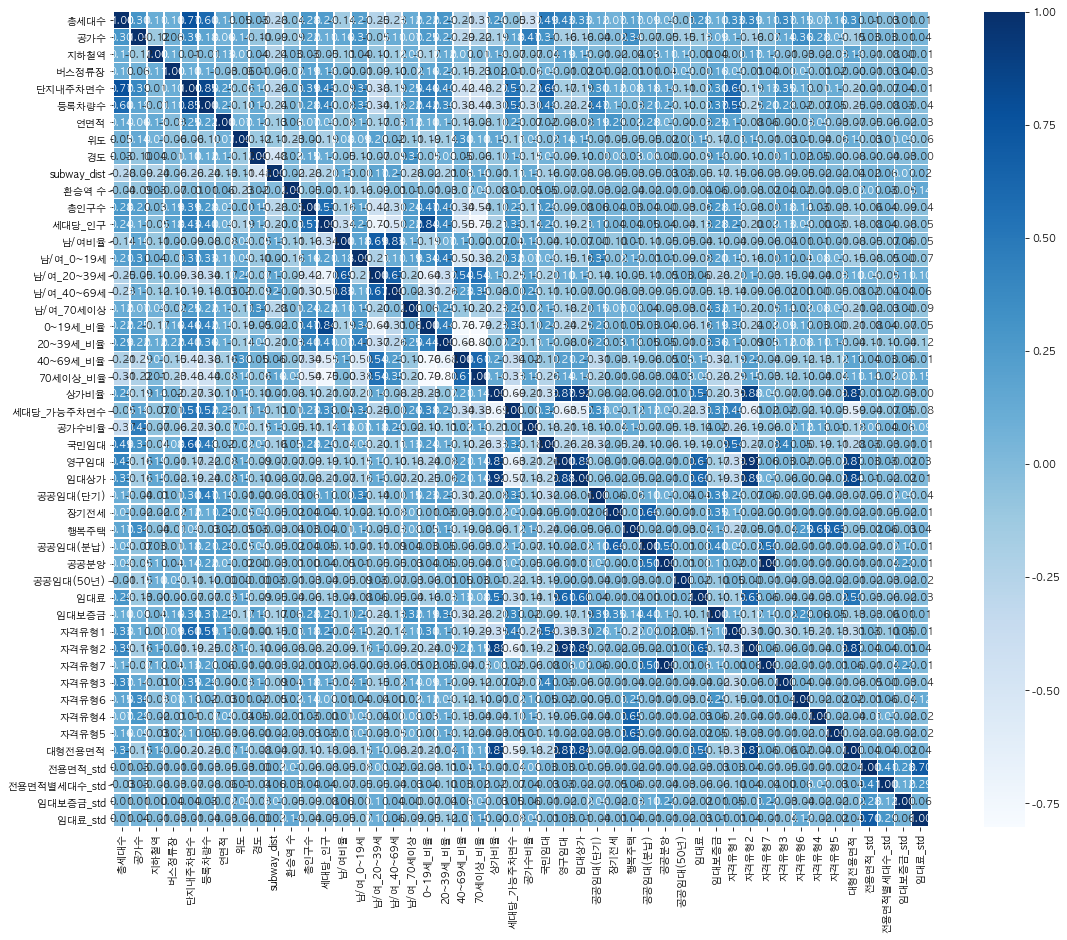

In [656]:
plt.subplots(figsize=(20,15))
sns.heatmap(X_cor.corr(), cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues', linewidths=.5)

### correlation 너무 높은 변수: 
- 영구임대&자격유형2 
- 임대상가&상가비율<br>

자격유형2랑 임대상가 drop

# Modeling

In [657]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
# from xgboost import XGBRegressor
from catboost import CatBoostRegressor
# import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from statsmodels.api import OLS

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
#standardScaler.fit(X_train)
#X_train = standardScaler.transform(X_train)
#standardScaler.fit(X_test)
#X_test = standardScaler.transform(X_test)

# Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

## 나눠서 modeling

In [658]:
pd.concat([pd.DataFrame(data.단지내주차면수.describe()),
           pd.DataFrame(dat.단지내주차면수.describe())], axis=1)

,단지내주차면수,단지내주차면수
count,414.0000,147.0000
mean,586.3309,558.3878
std,363.6656,321.0100
min,13.0000,29.0000
25%,318.2500,313.0000
50%,517.0000,499.0000
75%,785.7500,726.0000
max,"1,798.0000","1,696.0000"


In [659]:
data = data.drop([ '자격유형4','자격유형2','자격유형7','자격유형1','자격유형6', '자격유형5'],axis=1)
dat = dat.drop([ '자격유형4','자격유형2','자격유형7','자격유형1','자격유형6', '자격유형5'],axis=1)



In [660]:
lv = 987
train1=data[data.단지내주차면수<lv]
train2=data[data.단지내주차면수>=lv]
test1=dat[dat.단지내주차면수<lv]
test2=dat[dat.단지내주차면수>=lv]

In [661]:
sum(data.단지내주차면수<876),sum(data.단지내주차면수>=876)

(330, 84)

In [662]:
print(train1.shape, train2.shape)
print(test1.shape, test2.shape)
print(test1.shape[0]/train1.shape[0])
print(test2.shape[0]/train2.shape[0])

(362, 47) (52, 47)
(128, 44) (19, 44)
0.35359116022099446
0.36538461538461536


In [663]:
def fit(X_train, X_test, y_train, y_test, model):
    try:
        model.fit(X_train, y_train,verbose=False)
    except:
        model.fit(X_train, y_train)
    tst_pred = model.predict(X_test)
    error = mean_absolute_error(y_test,tst_pred)
    return model, tst_pred, error


def fit_models(X, y, models, cv=False):
    X = np.array(X.reset_index(drop=True))
    y = np.array(y.reset_index(drop=True))
    best_error = 10000
    best_tst_pred = 0
    best_model = ""
    if cv==False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=2021)
        for m in models:
            model, tst_pred, error = fit(X_train, X_test, y_train, y_test, m)
            if best_error > error:
                best_error = error
                best_tst_pred = tst_pred
                best_model = model
    else:
        best_tst_idx = []
        kf = KFold(n_splits = 5, shuffle=True,random_state = 2021)
        for m in models:
            print(m)
            mae = []
            pred= []
            tst_idx = []
            for train_index, test_index in kf.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                scaler = StandardScaler().fit(X_train)
                X_train = scaler.transform(X_train)
                X_test = scaler.transform(X_test)
                model, tst_pred, error = fit(X_train, X_test, y_train, y_test, m)
                mae.append(error)
                pred.append(tst_pred.tolist())
                tst_idx.append(test_index.tolist())
            cv_error = np.mean(mae)
            print(f"model:{str(m).split('(')[0]}\nMAE:{cv_error}")
            if best_error > cv_error:
                best_error = cv_error
                best_tst_pred = pred
                best_tst_idx = sum(tst_idx, [])
                best_model = model
        best_tst_pred = sum(best_tst_pred,[])
        best_tst_pred = dict(zip(best_tst_idx,best_tst_pred))
    try:
        best_model = best_model.fit(np.concatenate((X_train, X_test),axis=0), 
                                                np.concatenate((y_train, y_test),axis=0), 
                                                verbose=False)
    except:
        best_model = best_model.fit(np.concatenate((X_train, X_test),axis=0), 
                                        np.concatenate((y_train, y_test),axis=0))
    return best_model, best_tst_pred, best_error

In [664]:
models = [LinearRegression() ,
          PLSRegression(), 
          Ridge(random_state=2021),
#           Lasso(random_state=2021), 
          ElasticNet(random_state=2021),
          #SVR(),
          CatBoostRegressor(random_state=2021, loss_function = 'MAE'),
          RandomForestRegressor(criterion="mae",random_state=2021),
          GradientBoostingRegressor(criterion="mae",random_state=2021)
          #XGBRegressor(random_state=2021)
         ]

In [665]:
X1 = train1.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가"])
X1 = pd.get_dummies(X1, drop_first=True)
y1=train1["등록차량수"]

In [666]:
best_model1, best_tst_pred1, best_error1 = fit_models(X1, y1, models, cv=True)
best_model1,  best_error1

LinearRegression()
model:LinearRegression
MAE:106.64972581941872
PLSRegression()
model:PLSRegression
MAE:114.02886669169054
Ridge(random_state=2021)
model:Ridge
MAE:106.92727253792596
ElasticNet(random_state=2021)
model:ElasticNet
MAE:109.38114051273458
model:<catboost.core.CatBoostRegressor object at 0x7f8a2fae3700>
MAE:107.4575033248165
RandomForestRegressor(criterion='mae', random_state=2021)
model:RandomForestRegressor
MAE:112.44722621765602
GradientBoostingRegressor(criterion='mae', random_state=2021)
model:GradientBoostingRegressor
MAE:110.53405987906051


(LinearRegression(), 106.64972581941872)

In [667]:
#best_tst_pred1

In [668]:
models = [LinearRegression() ,
          PLSRegression(), 
          Ridge(random_state=2021),
          Lasso(random_state=2021), 
#           ElasticNet(random_state=2021),
          #SVR(),
          CatBoostRegressor(random_state=2021, loss_function = 'MAE'),
          RandomForestRegressor(criterion="mae",random_state=2021),
          GradientBoostingRegressor(criterion="mae",random_state=2021)
          #XGBRegressor(random_state=2021)
         ]

In [669]:
X2=train2.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가"])
X2 = pd.get_dummies(X2, drop_first=True)
y2=train2["등록차량수"]

In [670]:
best_model2, best_tst_pred2, best_error2=fit_models(X2, y2, models, cv=True)
best_model2, best_error2

LinearRegression()
model:LinearRegression
MAE:1267.1717072680306
PLSRegression()
model:PLSRegression
MAE:314.3344275530926
Ridge(random_state=2021)
model:Ridge
MAE:351.2440607379528
Lasso(random_state=2021)
model:Lasso
MAE:449.1091939699812
model:<catboost.core.CatBoostRegressor object at 0x7f8a2fac2f40>
MAE:301.36022321709197
RandomForestRegressor(criterion='mae', random_state=2021)
model:RandomForestRegressor
MAE:312.46807272727267
GradientBoostingRegressor(criterion='mae', random_state=2021)
model:GradientBoostingRegressor
MAE:347.804004633892


(<catboost.core.CatBoostRegressor at 0x7f8a2fac2f40>, 301.36022321709197)

In [671]:
 (105.9928 * 362 + 295.5874 * 52 ) /414

129.80661449275362

In [672]:
tst_pred1 = pd.merge(pd.DataFrame(best_tst_pred1,index=[0]).T.reset_index(),
         pd.DataFrame(train1[["단지코드","단지내주차면수"]].reset_index(drop=True)).reset_index(),
         on="index")
tst_pred2 = pd.merge(pd.DataFrame(best_tst_pred2,index=[0]).T.reset_index(),
         pd.DataFrame(train2[["단지코드","단지내주차면수"]].reset_index(drop=True)).reset_index(),
         on="index")

In [673]:
tst_pred1 = pd.merge(tst_pred1, pd.concat([train1.단지코드,y1],axis=1), on = "단지코드")
tst_pred2 = pd.merge(tst_pred2, pd.concat([train2.단지코드,y2],axis=1), on = "단지코드")

In [541]:
tst_pred1

,index,0,단지코드,단지내주차면수,등록차량수
0,0,516.8109,C2515,624.0000,205.0000
1,1,648.6065,C1945,734.0000,730.0000
2,2,539.0782,C1470,645.0000,553.0000
3,6,637.0804,C2513,530.0000,820.0000
4,8,483.9539,C2049,631.0000,841.0000
...,...,...,...,...,...
357,347,632.4982,C2225,842.0000,448.0000
358,348,307.9809,C1045,288.0000,266.0000
359,349,123.1170,C1207,54.0000,59.0000
360,350,144.1493,C1970,108.0000,159.0000


In [604]:
q = list(tst_pred1["단지내주차면수"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
q

[13.0,
 166.1,
 249.8,
 329.29999999999995,
 393.0,
 451.5,
 530.0,
 633.0999999999999,
 730.4000000000001,
 856.6000000000001,
 986.0]

In [605]:
q2 = list(tst_pred2["단지내주차면수"].quantile([0,.2,.4,.6,.8,1]))
q2

[988.0, 1069.2, 1162.8000000000002, 1291.6, 1528.2000000000003, 1798.0]

In [674]:
tst_pred1["realclass"] = [99]*len(tst_pred1)
for i in range(len(q[:-1])):
    tst_pred1.loc[(tst_pred1.등록차량수>=q[i])&(tst_pred1.등록차량수<q[i+1]),"realclass"] = i
tst_pred1.loc[tst_pred1.등록차량수==q[5],"realclass"] = 4

tst_pred1["predclass"] = [99]*len(tst_pred1)
for i in range(len(q[:-1])):
    tst_pred1.loc[(tst_pred1[0]>=q[i])&(tst_pred1[0]<q[i+1]),"predclass"] = i
tst_pred1.loc[tst_pred1[0]==q[5],"predclass"] = 4

In [675]:
tst_pred2["realclass"] = [99]*len(tst_pred2)
for i in range(len(q2[:-1])):
    tst_pred2.loc[(tst_pred2.등록차량수>=q2[i])&(tst_pred2.등록차량수<q2[i+1]),"realclass"] = i
tst_pred2.loc[tst_pred2.등록차량수==q2[5],"realclass"] = 4

tst_pred2["predclass"] = [99]*len(tst_pred2)
for i in range(len(q2[:-1])):
    tst_pred2.loc[(tst_pred2[0]>=q2[i])&(tst_pred2[0]<q2[i+1]),"predclass"] = i
tst_pred2.loc[tst_pred1[0]==q2[5],"predclass"] = 4

In [676]:
print(q)
print(q2)

[13.0, 166.1, 249.8, 329.29999999999995, 393.0, 451.5, 530.0, 633.0999999999999, 730.4000000000001, 856.6000000000001, 986.0]
[988.0, 1069.2, 1162.8000000000002, 1291.6, 1528.2000000000003, 1798.0]


In [471]:
col = ["단지코드","단지내주차면수","총세대수","세대당_가능주차면수","상가비율","연면적","공가수","공가수비율","임대보증금"]
tst_pred1 = pd.merge(pd.DataFrame(best_tst_pred1,index=[0]).T.reset_index(),
         pd.DataFrame(train1[col].reset_index(drop=True)).reset_index(),
         on="index")

tst_pred2 = pd.merge(pd.DataFrame(best_tst_pred2,index=[0]).T.reset_index(),
         pd.DataFrame(train2[col].reset_index(drop=True)).reset_index(),
         on="index")

In [472]:
tst_pred1 = pd.merge(tst_pred1, pd.concat([train1.단지코드,y1],axis=1), on = "단지코드")
tst_pred2 = pd.merge(tst_pred2, pd.concat([train2.단지코드,y2],axis=1), on = "단지코드")

In [473]:
tst_pred1["diff"] = tst_pred1["등록차량수"]-tst_pred1[0]
tst_pred2["diff"] = tst_pred2["등록차량수"]-tst_pred2[0]

In [478]:
tst_pred1.describe()

,index,0,단지내주차면수,총세대수,세대당_가능주차면수,상가비율,연면적,공가수,공가수비율,임대보증금,등록차량수,diff
count,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000,362.0000
mean,180.5000,475.1429,485.1298,634.7348,0.7920,0.0587,"3,505.7164",12.4503,0.0242,"23,292,735.3775",476.9309,1.7881
std,104.6446,220.8250,247.6510,326.7310,0.2419,0.1965,"4,753.0361",9.5322,0.0227,"15,267,803.7887",278.9526,151.5001
min,0.0000,68.0142,13.0000,26.0000,0.1092,0.0000,5.6880,0.0000,0.0000,"850,758.7691",13.0000,-589.4978
25%,90.2500,280.3683,287.2500,409.2500,0.7071,0.0000,196.7800,4.0000,0.0084,"14,382,950.0000",266.0000,-73.1111
50%,180.5000,484.6262,451.5000,581.0000,0.8268,0.0000,"2,621.0388",11.0000,0.0186,"19,420,150.0000",448.5000,-4.6440
75%,270.7500,648.7902,670.2500,817.5000,0.9124,0.0000,"5,418.5543",18.0000,0.0328,"27,307,333.3333",648.7500,68.6155
max,361.0000,"1,107.0330",986.0000,"2,428.0000",1.5449,0.8824,"53,027.3008",49.0000,0.1750,"124,037,732.1000","1,653.0000",669.0231


In [479]:
pd.set_option('display.max_rows', None)
tst_pred1.sort_values("등록차량수")

,index,0,단지코드,단지내주차면수,총세대수,세대당_가능주차면수,상가비율,연면적,공가수,공가수비율,임대보증금,등록차량수,diff
286,343,106.8657,C2059,13.0000,26,0.5000,0.0000,"1,468.5624",1.0000,0.0385,"40,023,000.0000",13.0000,-93.8657
217,360,118.6372,C2437,30.0000,90,0.3333,0.0000,88.8600,12.0000,0.1333,"10,346,000.0000",16.0000,-102.6372
82,65,175.5715,C2401,164.0000,213,0.7700,0.0000,"5,483.8340",21.0000,0.0986,"31,019,666.6667",19.0000,-156.5715
145,359,167.3009,C2020,25.0000,40,0.6250,0.0000,152.2900,7.0000,0.1750,"28,133,333.3333",19.0000,-148.3009
264,241,76.5307,C1316,27.0000,107,0.2523,0.0000,"3,834.7900",7.0000,0.0654,"27,043,800.0000",22.0000,-54.5307
14,46,120.8729,C1899,109.0000,451,0.2417,0.3333,214.7300,0.0000,0.0000,"5,573,033.3333",31.0000,-89.8729
85,73,92.3965,C2536,54.0000,72,0.7500,0.0000,"2,207.0800",7.0000,0.0972,"10,586,666.6667",47.0000,-45.3965
58,270,106.9764,C2237,50.0000,70,0.7143,0.0000,"2,183.8000",7.0000,0.1000,"10,371,333.3333",55.0000,-51.9764
216,357,133.3991,C2586,66.0000,90,0.7333,0.0000,67.9800,7.0000,0.0778,"26,160,000.0000",57.0000,-76.3991
359,349,123.1170,C1207,54.0000,100,0.5400,0.0000,11.4500,10.0000,0.1000,"28,073,333.3333",59.0000,-64.1170


In [480]:
tst_pred2.describe()

,index,0,단지내주차면수,총세대수,세대당_가능주차면수,상가비율,연면적,공가수,공가수비율,임대보증금,등록차량수,diff
count,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.0000
mean,25.5000,"1,198.5091","1,290.8462","1,350.7500",0.9848,0.0000,"5,269.4239",20.3846,0.0157,"34,096,141.3743","1,218.7308",20.2216
std,15.1548,217.6469,241.0198,366.0951,0.1616,0.0000,"5,040.3371",12.8157,0.0101,"20,244,928.4641",447.6141,373.9367
min,0.0000,808.5890,988.0000,742.0000,0.6991,0.0000,8.8400,0.0000,0.0000,"11,900,000.0000",196.0000,-770.2331
25%,12.7500,"1,058.6902","1,103.7500","1,103.5000",0.8629,0.0000,699.8335,10.0000,0.0078,"21,020,100.0000",913.0000,-218.1666
50%,25.5000,"1,142.0738","1,201.5000","1,323.5000",1.0046,0.0000,"6,114.3135",20.0000,0.0144,"30,441,138.8889","1,149.0000",-8.9565
75%,38.2500,"1,338.7467","1,494.7500","1,515.0000",1.0602,0.0000,"7,265.8424",29.0000,0.0226,"42,490,259.7403","1,408.2500",225.0837
max,51.0000,"1,808.7347","1,798.0000","2,568.0000",1.3791,0.0000,"31,427.4300",55.0000,0.0394,"133,065,428.5714","2,550.0000",930.8836


In [677]:
from sklearn.metrics import confusion_matrix as cm 
print(cm(tst_pred1.realclass,tst_pred1.predclass))
print(cm(tst_pred2.realclass,tst_pred2.predclass))

[[26 13  4  1  1  1  1  0  0  0  8]
 [ 4  5  8  4  2  1  4  0  0  0  0]
 [ 2  7 18  7  3  2  1  0  0  1  0]
 [ 0  2  8  7  4  3  0  3  0  1  0]
 [ 0  0  5  7  7  8  4  2  0  0  0]
 [ 0  0  1  2 11 11  6  3  2  0  0]
 [ 0  0  0  1  7  8 14  9  4  0  0]
 [ 0  0  1  1  1  3  9 11  4  0  1]
 [ 0  0  0  1  0  1  5  8 13  7  0]
 [ 0  0  0  0  0  0  1  2  6  3  6]
 [ 0  0  0  0  0  0  0  2  8  1  3]]
[[0 2 3 1 0 1]
 [1 2 2 0 0 0]
 [1 4 1 0 0 0]
 [0 1 5 2 0 0]
 [0 1 0 3 0 1]
 [4 1 4 7 1 4]]


In [608]:
from sklearn.metrics import confusion_matrix as cm 
print(cm(tst_pred1.realclass,tst_pred1.predclass))
print(cm(tst_pred2.realclass,tst_pred2.predclass))



[[32 13  5  3  0  1  1  0  0  0  0]
 [ 3  8  8  1  2  4  1  1  0  0  0]
 [ 0 10 18  8  1  1  1  1  0  1  0]
 [ 1  0  8  6  5  3  3  1  0  1  0]
 [ 0  1  2  9  7  9  2  3  0  0  0]
 [ 0  0  2  3  2 13 11  5  0  0  0]
 [ 0  0  0  1  2  8 20  8  4  0  0]
 [ 0  0  1  0  1  4 10 13  2  0  0]
 [ 0  0  0  0  1  1  1 12 17  3  0]
 [ 0  0  0  0  0  0  2  2 10  3  1]
 [ 0  0  0  0  0  0  0  4  7  3  0]]
[[0 4 0 2 0 1]
 [1 1 2 0 0 1]
 [4 1 1 0 0 0]
 [1 1 2 3 1 0]
 [0 1 1 2 0 1]
 [1 6 1 4 3 6]]


In [547]:
from sklearn.metrics import confusion_matrix as cm 
print(cm(tst_pred1.realclass,tst_pred1.predclass))
print(cm(tst_pred2.realclass,tst_pred2.predclass))



[[31 13  7  1  1  1  1  0  0  0  0]
 [ 2  8  9  1  3  3  1  1  0  0  0]
 [ 0 10 19  7  0  2  1  1  0  1  0]
 [ 1  1  4  8  6  3  3  1  0  1  0]
 [ 0  0  2  9  8  6  7  1  0  0  0]
 [ 0  0  1  4  2 14 11  4  0  0  0]
 [ 0  0  0  1  2  7 20  9  4  0  0]
 [ 0  0  1  0  1  5 10  9  5  0  0]
 [ 0  0  0  0  0  2  1 14 16  2  0]
 [ 0  0  0  0  0  0  4  0 11  2  1]
 [ 0  0  0  0  0  0  0  6  5  3  0]]
[[0 4 0 2 0 1]
 [1 1 2 0 0 1]
 [4 1 1 0 0 0]
 [1 1 2 3 1 0]
 [0 1 1 2 0 1]
 [1 6 1 4 3 6]]


In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = best_model1.feature_importances_.argsort()
plt.barh(X1.columns[sorted_feature_importance], 
        best_model1.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost1 Feature Importance")

In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = best_model2.feature_importances_.argsort()
plt.barh(X2.columns[sorted_feature_importance], 
        best_model2.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost1 Feature Importance")

In [ ]:
X1.columns

In [ ]:
train["km1"] = kmeans.labels_
plt.figure(figsize=(20,24))
for i,r in enumerate(X1.columns):
    plt.subplot(12,6,i+1)
    sns.boxplot(train.km1, train[r])
    plt.title(r)

In [ ]:
sns.scatterplot(x = r,y = "등록차량수/총세대수", hue = "km1",data = train,alpha = 0.5)

In [ ]:
sns.scatterplot(x = train1.,y = "등록차량수/총세대수", hue = "km1",data = train,alpha = 0.5)

In [ ]:
tst_pred2.

In [ ]:
train.columns

In [ ]:
train.loc[train.지역 == "제주특별자치도","환승역 수"]

In [ ]:
(97*330 + 275*84)/414

- 은영이의 최고 코드로 예측했을때 
- 단지내주차면수가 작은 그룹에서.. 단지내주차면수

In [ ]:
model_1=CatBoostRegressor(random_state=2021, verbose=False).fit(X_train1, y_train1)
model1_pred = model_1.predict(X_test1)

In [ ]:
best_tst_pred1

In [ ]:
#best_model2, best_tst_pred2, best_error2

In [ ]:
X1 = train1.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                           "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"
                         ])
X1 = pd.get_dummies(X1, drop_first=True)
y1=train1["등록차량수"]

In [ ]:
best_model_1, best_tst_pred_1, best_error_1 = fit_models(X1, y1, models, cv=True)

In [ ]:
#best_tst_pred_1

In [ ]:
X2=train2.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                       "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X2 = pd.get_dummies(X2, drop_first=True)
y2=train2["등록차량수"]

In [ ]:
best_model_2, best_tst_pred_2, best_error_2=fit_models(X2, y2, models, cv=True)

In [ ]:
#best_tst_pred_2

In [ ]:
기존=pd.merge(pd.DataFrame(best_tst_pred1,index=[0]).T.reset_index(),
         pd.DataFrame(train1.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

In [ ]:
자격유형드랍=pd.merge(pd.DataFrame(best_tst_pred_1,index=[0]).T.reset_index(),
         pd.DataFrame(train1.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

In [ ]:
df=pd.merge(기존, 자격유형드랍, on="단지코드", how='inner')

In [ ]:
df.columns

In [ ]:
df=df.drop(columns=["index_x", "index_y"])

In [ ]:
df=pd.merge(df, train1[["단지코드", "등록차량수"]], on="단지코드", how="inner")

In [ ]:
df.columns=['pred_기본', '단지코드', 'pred_자격유형x', 'real_Y']

In [ ]:
df=df[['단지코드', 'pred_기본', 'pred_자격유형x', 'real_Y']]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#df

In [ ]:
df["diff"]=abs(df.pred_기본-df.pred_자격유형x)

In [ ]:
#df.sort_values("diff")

In [ ]:
#train1[train1.상가비율>=0.7][["단지코드", "지역", "등록차량수", "단지내주차면수", "총세대수"]]

In [ ]:
#train[train.단지코드=="C1616"][["단지코드","총세대수", "단지내주차면수", "등록차량수", "세대당_인구", "상가비율"]]

In [ ]:
기존=pd.merge(pd.DataFrame(best_tst_pred2,index=[0]).T.reset_index(),
         pd.DataFrame(train2.단지코드.reset_index(drop=True)).reset_index(),
         on="index")
자격유형드랍=pd.merge(pd.DataFrame(best_tst_pred_2,index=[0]).T.reset_index(),
         pd.DataFrame(train2.단지코드.reset_index(drop=True)).reset_index(),
         on="index")

df2=pd.merge(기존, 자격유형드랍, on="단지코드", how='inner')
df2=df2.drop(columns=["index_x", "index_y"])

df2=pd.merge(df2, train2[["단지코드", "등록차량수"]], on="단지코드", how="inner")
df2.columns=['pred_기본', '단지코드', 'pred_자격유형x', 'real_Y']
df2=df2[['단지코드', 'pred_기본', 'pred_자격유형x', 'real_Y']]

In [ ]:
#df2

In [ ]:
df2["diff"]=abs(df2.pred_기본-df2.pred_자격유형x)

In [ ]:
df2.sort_values("diff")

In [ ]:
print(best_error1, best_error_1)
print(best_error2, best_error_2)

In [ ]:
#df.to_csv("785미만.csv", index=False)
#df2.to_csv("785이상.csv", index=False)

# 나눠서 예측

In [ ]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

In [ ]:
sample.shape

In [ ]:
train1=data[data.단지내주차면수<785]
train2=data[data.단지내주차면수>=785]
test1=dat[dat.단지내주차면수<785]
test2=dat[dat.단지내주차면수>=785]

In [ ]:
print(train1.shape, train2.shape)
print(test1.shape, test2.shape)

In [ ]:
df= pd.concat([train1, test1])

In [ ]:
X = df.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가", 
                     "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train1=X.iloc[0:310, :]
X_test1=X.iloc[310:, :]
y_train1 = train1[['등록차량수']]

In [ ]:
#X.test["장기전세"]=0
#X.test["공공분양"]=0

In [ ]:
model_1=CatBoostRegressor(random_state=2021, verbose=False).fit(X_train1, y_train1)
model1_pred = model_1.predict(X_test1)

In [ ]:
model1=pd.DataFrame(model1_pred)
code1=test1.단지코드
model1=model1.reset_index(drop=True)
code1=code1.reset_index(drop=True)

In [ ]:
pred1=pd.concat([code1, model1], axis=1, ignore_index=True)
pred1.columns=["code", "num"]
pred1.head()

In [ ]:
df= pd.concat([train2, test2])

In [ ]:
X = df.drop(columns=['단지명','단지코드','도로명주소','subway_name',
                         '등록차량수', "임대상가",
                    "자격유형1","자격유형2","자격유형3","자격유형4","자격유형5","자격유형6","자격유형7"])
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train2=X.iloc[0:104, :]
X_test2=X.iloc[104:, :]
y_train2 = train2[['등록차량수']]

In [ ]:
#X.test["장기전세"]=0
#X.test["공공분양"]=0

In [ ]:
model_2= CatBoostRegressor(random_state=2021, verbose=False).fit(X_train2, y_train2)
model2_pred = model_2.predict(X_test2)

In [ ]:
model2=pd.DataFrame(model2_pred)
code2=test2.단지코드
model2=model2.reset_index(drop=True)
code2=code2.reset_index(drop=True)

In [ ]:
pred2=pd.concat([code2, model2], axis=1, ignore_index=True)
pred2.columns=["code", "num"]
pred2.head()

In [ ]:
df_merge=pd.DataFrame(pd.concat([pred1, pred2], axis=0))
df_merge=df_merge.reset_index(drop=True)

In [ ]:
df_merge.head()

In [ ]:
test_split=pd.merge(sample, df_merge, on='code', how='outer')

In [ ]:
test_split.head()

In [ ]:
test_split= test_split.drop(columns='num_x')
test_split.columns=["code","num"]

In [ ]:
test_split[test_split.num<=0].index

In [ ]:
one=pd.read_csv("0719_1.csv")
one = one.loc[~one.code.isin(['C2335', 'C1327', 'C2675'])]
test_= test_split.loc[~test_split.code.isin(['C2335', 'C1327', 'C2675'])]
round(mean_absolute_error(one.num, test_.num))

In [ ]:
#test_split.to_csv('0719_1.csv', index=False)

In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = model_1.feature_importances_.argsort()
plt.barh(X1.columns[sorted_feature_importance], 
        X1.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost1 Feature Importance")

In [ ]:
plt.subplots(figsize=(17,15))
sorted_feature_importance = model_2.feature_importances_.argsort()
plt.barh(X_test2.columns[sorted_feature_importance], 
        model_2.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost2 Feature Importance")